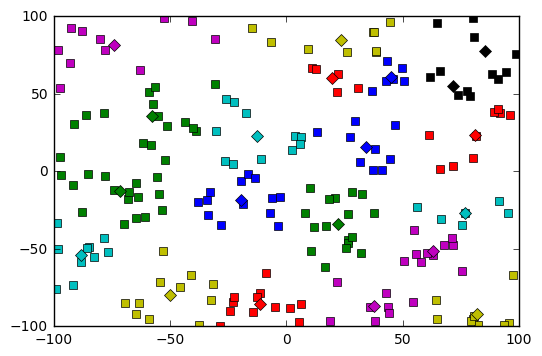

In [1]:
import numpy as np
import os
import random
import pylab as pl
#Kmeans clustering
#rasgele tablo baþlatýlýyor
#matplotlib kullanýldý

def kmeans(data, k):
    centroids = []
    centroids = createCentroids(data, centroids, k)
    previous = [[] for i in range(k)]
    iterations = 0
    while not (checkConvergence(centroids, previous, iterations)):
        iterations += 1
        clusters = [[] for i in range(k)]
        clusters = distance(data, centroids, clusters)
        index = 0
        for cluster in clusters:
            previous[index] = centroids[index]
            centroids[index] = np.mean(cluster, axis=0).tolist()
            index += 1
    for cluster in clusters:
        np.array(cluster).tolist()
    return centroids, clusters

def distance(data, centroids, clusters):
    for instance in data:
        mu_index = min([(i[0], np.linalg.norm(instance-centroids[i[0]])) \
                            for i in enumerate(centroids)], key=lambda t:t[1])[0]
        try:
            clusters[mu_index].append(instance)
        except KeyError:
            clusters[mu_index] = [instance]
    for cluster in clusters:
        if not cluster:
            cluster.append(data[np.random.randint(0, len(data), size=1)].flatten().tolist())

    return clusters

def createCentroids(data, centroids, k):
    for cluster in range(0, k):
        centroids.append(data[np.random.randint(0, len(data), size=1)].flatten().tolist())
    return centroids

def checkConvergence(centroids, previous, iterations):
    return previous == centroids or iterations > 100

def create(N, x , y):
    X = np.array([(random.uniform(-1, 1)*x, random.uniform(-1, 1) *y) for i in range(N)])
    return X

def graph(N, K, x, y):
    centroids, clusters = kmeans(create(N, x, y), K)
    count = 0
    for cluster in clusters:
        centx = centroids[count][0]
        centy = centroids[count][1]
        x = []
        y = []
        for coord in cluster:
            x.append(coord[0])
            y.append(coord[1])
        color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        pl.plot(x, y, color[count%7] +'s')
        pl.plot(centx, centy, color[count%7] + 'D')
        count = count + 1
    pl.show()
XWIDTH = 100
YWIDTH = 100
clusters = 20
points = 200
graph(points, clusters, XWIDTH, YWIDTH)